In [1]:
# Importing various Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('avocado.csv')

## Exploratory Data Analysis -- Understanding the Avocado data

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [6]:
df = df.drop('Unnamed: 0', axis=1)   #Dropping unwanted column

In [7]:
df = df.dropna()

In [8]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [9]:
df.info()      # 2 columns with categorical type variables excluding the Date column  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


In [10]:
df['Date']= pd.to_datetime(df['Date'])   # Changing into Pandas Date Format

In [11]:
df['Month'] = df["Date"].dt.month   # Creating one New Column Month

In [12]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11


In [13]:
df.isnull().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
Month           False
dtype: bool

Here we can observe there are no empty values in any column

In [14]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

In [15]:
df.nunique()

Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
Month             12
dtype: int64

In [16]:
df.type.unique()   # There is only one type of Avocado in the Dataset

array(['conventional'], dtype=object)

In [17]:
df.year.unique()

array([2015., 2016.])

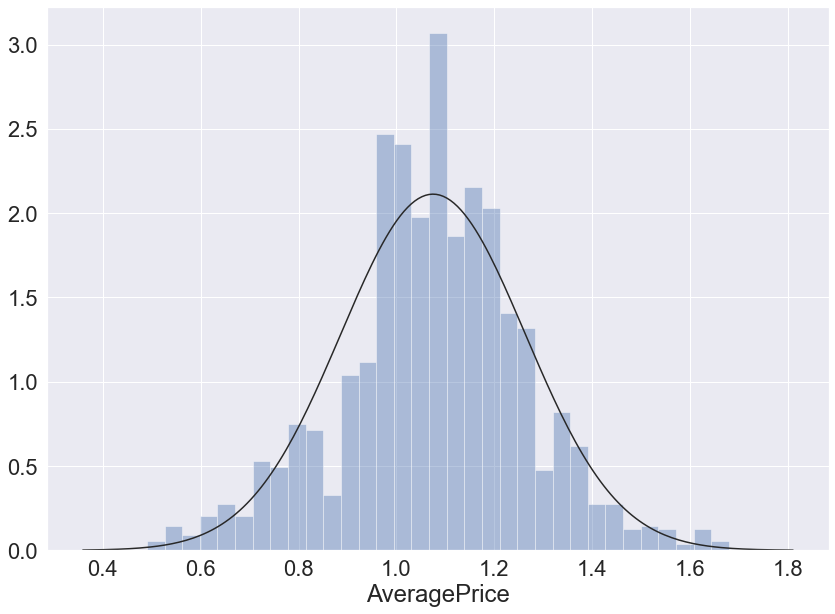

In [18]:
# Visualizing the Average price distribution and range
sns.set(font_scale=2) 
fig, ax = plt.subplots(figsize=(14, 10))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

The Average price lies between 0.4 and 1.8 and Maximum values are between 1 and 1.2 and the Data is not Skewed.

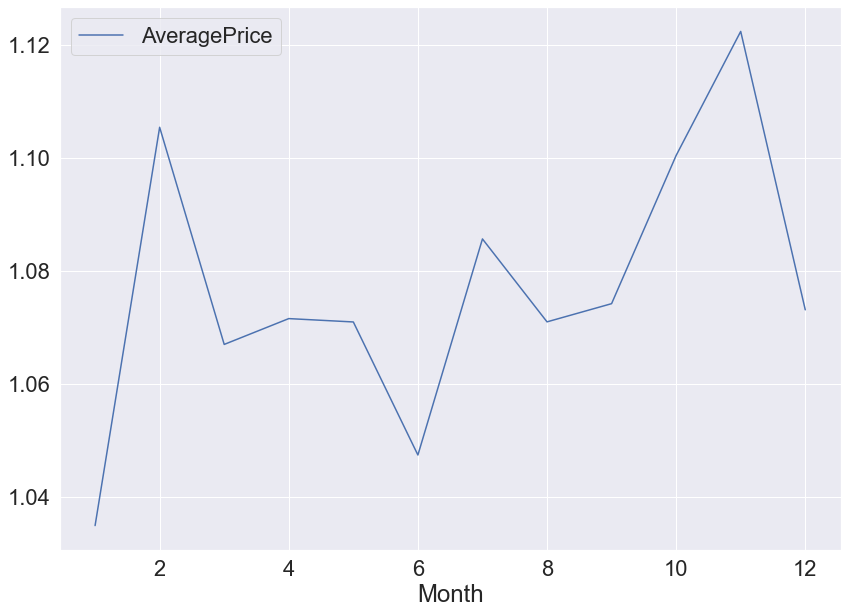

In [19]:
df.groupby(['Month']).mean().reset_index().plot(x = 'Month', y = 'AveragePrice',figsize = (14,10))

It is observed that Average Price of Avocado is Maximum between 10 and 12 i.e. October and December... It is High till 2 i.e February. The price is lowest in June

Text(0.5, 1.0, 'Average Price')

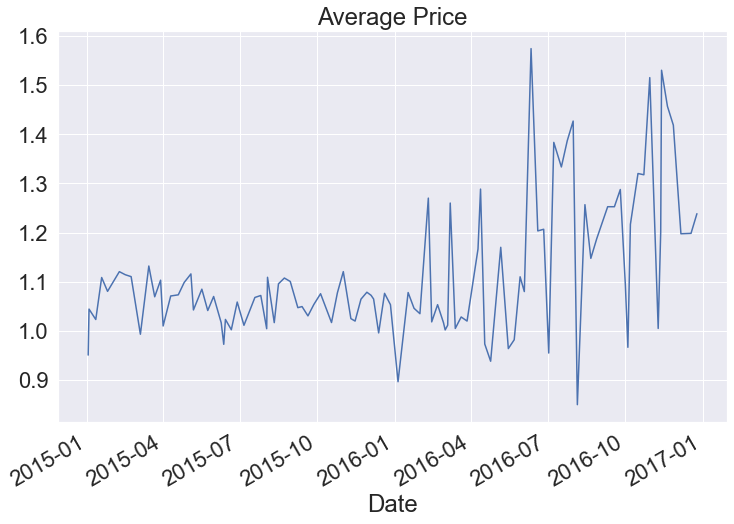

In [20]:
newdf=df.groupby('Date').mean()    # Grouping by Date
plt.figure(figsize=(12,8))
newdf['AveragePrice'].plot()
plt.title('Average Price')

It is observed that the Average price has increased from 2016.

In [21]:
new_df1 = df.groupby(['region']).mean().reset_index()     # Grouping by mean Region-wise

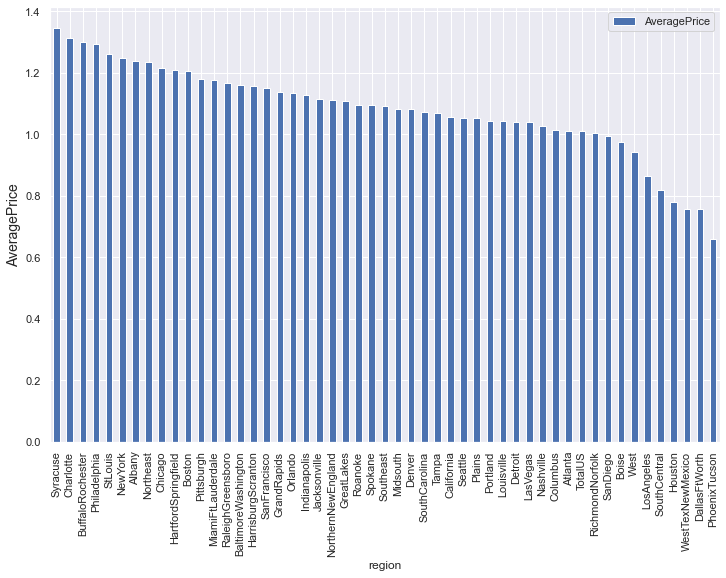

In [22]:
# Plotting average price region-wise
sns.set(font_scale=1)
new_df1[['region','AveragePrice']].sort_values(by=['AveragePrice'], ascending= [False]).plot(x = 'region', 
                                y = 'AveragePrice',kind = 'bar',figsize = (12,8))
plt.ylabel('AveragePrice', size=14)
plt.show()

The Price is Highest in Syracuse and Charlotte and lowest in Phoenix Tucson

In [23]:
new_df2 = df.groupby(['region']).sum().reset_index()     # Grouping by Sum Region-wise

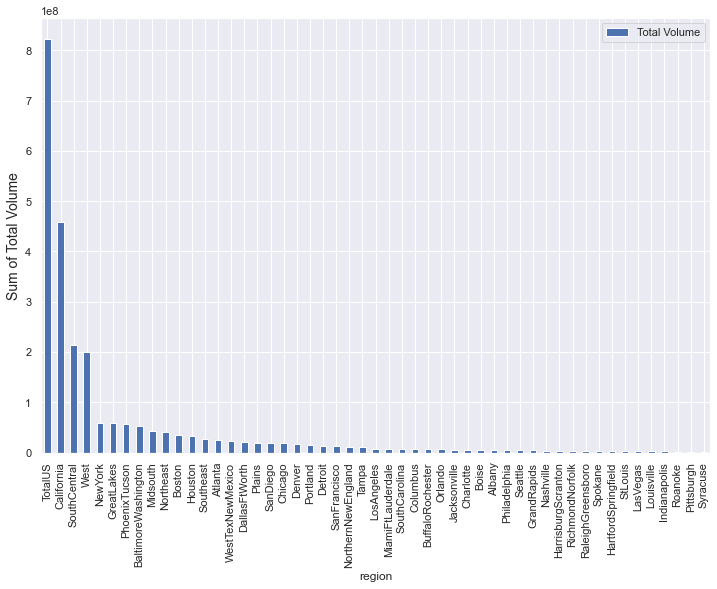

In [24]:
# Plotting Average Volume region-wise
sns.set(font_scale=1)
new_df2[['region','Total Volume']].sort_values(by=['Total Volume'], ascending= [False]).plot(x = 'region', 
                                y = 'Total Volume',kind = 'bar',figsize = (12,8))
plt.ylabel('Sum of Total Volume', size=14)
plt.show()

The Total consumption is High in the regions:
    1. California
    2. SouthCentral
    3. West
TotalUS is showing the Highest Consumption in the plot.

The consumption of Avocado is Low in Syracuse interestingly which have the highest average price of Avocado.

In [25]:
len(df[df['region'] == 'TotalUS'])     # 25 rows are there where region == 'TotalUS'

25

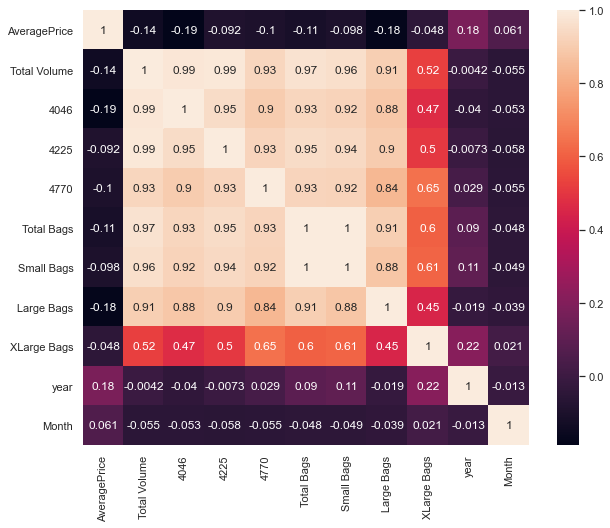

In [26]:
#finding the correlation between variables using heat map.
ax,fig = plt.subplots(figsize=(10,8))
df_corr = df.corr()
sns.heatmap(df_corr, annot=True)
plt.show()

All the Variables has almost not co-relation with Average Price. Instead the variables are corelated to each other which is not good for Regression Prediction

### Feature Engineering before Model Building 

In [27]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11


In [28]:
df.type.unique()    # Only one type

array(['conventional'], dtype=object)

In [29]:
# Dropping the Unwanted columns
# Dropping column 'type' because there is only one type, also removing 'Date' since we have Month and Year columns
data = df.copy()
data = data.drop(['type','Date'], axis = 1)    

In [30]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany,11


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   year          1517 non-null   float64
 10  region        1517 non-null   object 
 11  Month         1517 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 154.1+ KB


In [32]:
# Since region is categorical data converting it into numbers
lbl=LabelEncoder()
data['region'] = lbl.fit_transform(data['region'])

In [33]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,7,10
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,7,9
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,7,2
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,7,9


In [34]:
data.info()  # All Data now in quantitative form

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   year          1517 non-null   float64
 10  region        1517 non-null   int32  
 11  Month         1517 non-null   int64  
dtypes: float64(10), int32(1), int64(1)
memory usage: 148.1 KB


### Regression Problem -- Predicting the Average price 

In [62]:
y = data['AveragePrice'].values   #the target column

In [63]:
# The variables array X 
data_ml= data.drop(['AveragePrice'],1)
X = data_ml.values
data_ml.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0,12
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0,12
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0,12
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0,6
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0,11


In [79]:
# Splitting into training and Test dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [80]:
# Importing some regression models and performance metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [81]:
# Models taken for Regression 
model_list = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]  

In [82]:
#Building Function for Model Testing
def reg_function(model_list):
    for model in model_list:
        model.fit(X_train,y_train)
        pred=model.predict(X_test)
        print('Model Name :', model)
        print('MAE:', metrics.mean_absolute_error(y_test, pred))
        print('MSE:', metrics.mean_squared_error(y_test, pred))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)),'\n')

In [83]:
reg_function(model_list)

Model Name : LinearRegression()
MAE: 0.13743907311684653
MSE: 0.03163951594854858
RMSE: 0.177875000909483 

Model Name : DecisionTreeRegressor()
MAE: 0.08276315789473683
MSE: 0.015219736842105262
RMSE: 0.1233682975569707 

Model Name : RandomForestRegressor()
MAE: 0.06439638157894736
MSE: 0.007978511875000002
RMSE: 0.08932251605838251 



It is observed that the Best Model is the RandomForestRegressor with the Lowest RMSE  value

,Y Test,Pred
0,0.98,1.2360
1,0.98,0.9971
2,1.17,1.1654
3,0.77,0.8515
4,0.63,0.8014


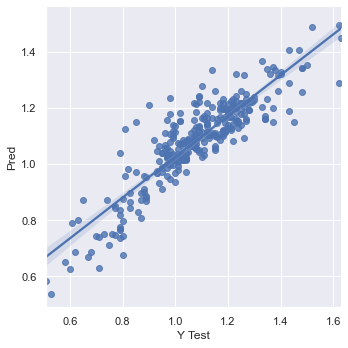

In [84]:
# Plotting Actual values vs Predicted Values for the Final Model
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train,y_train)
pred = RandomForest.predict(X_test)
pred_data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred', data = pred_data)
pred_data.head()

In [86]:
RandomForest.score(X_test,y_test)

0.7847781021641063

It is observed that the Random Forest Regression Model is giving Good Prediction even though we have observed very less co-relation of Average Price with the other variables in the corelation heatmap plot

#### We can use Minmax Scaling for Improving this model

In [87]:
#Importing Minmax Scaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

REGRESSION SCORE : 0.791147205831919


,Y Test,Pred
0,0.98,1.2360
1,0.98,0.9971
2,1.17,1.1654
3,0.77,0.8515
4,0.63,0.8014


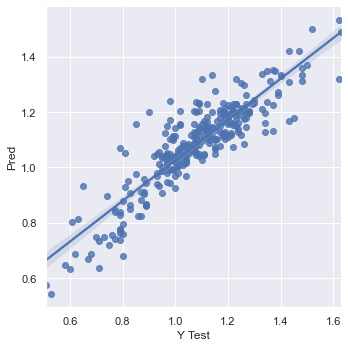

In [101]:
# Testing the Model again after Scaling
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train_minmax,y_train)
pred = RandomForest.predict(X_test_minmax)
pred_data2 = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred', data = pred_data2)
print("REGRESSION SCORE :",RandomForest.score(X_test_minmax,y_test))
pred_data.head()

In [102]:
print("REGRESSION SCORE :",RandomForest.score(X_test_minmax,y_test))

REGRESSION SCORE : 0.791147205831919


In [103]:
#Saving the Best Model
import joblib
# Saving the model as a pickle in a file
joblib.dump(RandomForest,"avocado_regression.pkl")

['avocado_regression.pkl']

### Classification Problem -- Predicting Region

In [104]:
#importing the classification models
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [105]:
y_cls = data['region'].values   #the target column

In [106]:
data['region'].unique()  # We have to perform classification of 51 classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [107]:
len(data)

1517

In [108]:
1517/51     # Roughly 30 rows are there for each classes

29.745098039215687

The prediction won't be good. Since there are very less data considering 51 classes. 1517 rows

In [109]:
# The variables array X 
data_cls= data.drop(['region'],1)
X_cls = data_cls.values
data_cls.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,11


In [110]:
# Splitting into training and Test dataset
X_train,X_test,y_train,y_test=train_test_split(X_cls,y_cls,test_size=0.2,random_state=100)

In [111]:
model_list = [KMeans(),LogisticRegression(),RandomForestClassifier()]

In [112]:
#Building Function for Model Testing
def classification_function(model_list):
    for model in model_list:
        model.fit(X_train,y_train)
        pred=model.predict(X_test)
        print('Model Name :', model)
        print("accuracy_score: ",accuracy_score(y_test,pred))
        #print(confusion_matrix(y_test,pred))
        #print(classification_report(y_test,pred))
        print('\n')

In [113]:
classification_function(model_list)

Model Name : KMeans()
accuracy_score:  0.003289473684210526


Model Name : LogisticRegression()
accuracy_score:  0.2894736842105263


Model Name : RandomForestClassifier()
accuracy_score:  0.9572368421052632




#### Testing again after Scaling

In [114]:
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

In [115]:
for model in model_list:
        model.fit(X_train_minmax,y_train)
        pred=model.predict(X_test_minmax)
        print('Model Name :', model)
        print("accuracy_score: ",accuracy_score(y_test,pred))
        #print(confusion_matrix(y_test,pred))
        #print(classification_report(y_test,pred))
        print('\n')

Model Name : KMeans()
accuracy_score:  0.029605263157894735


Model Name : LogisticRegression()
accuracy_score:  0.20065789473684212


Model Name : RandomForestClassifier()
accuracy_score:  0.9671052631578947




Best Model is Random Forest Classifier which will be the Final Model

In [116]:
randfor = RandomForestClassifier()
randfor.fit(X_train,y_train)
predictions = randfor.predict(X_test)

In [117]:
print("accuracy_score: ",accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))

accuracy_score:  0.9605263157894737
[[12  0  0 ...  0  0  0]
 [ 0  5  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0  3]]


In [118]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        12
           5       1.00      0.88      0.93         8
           6       1.00      1.00      1.00        17
           7       0.88      1.00      0.93         7
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         1
          14       0.80      1.00      0.89         4
          15       1.00      1.00      1.00         6
          16       0.67      1.00      0.80         2
          17       1.00    

In [119]:
#Saving the Best Model
import joblib
# Saving the model as a pickle in a file
joblib.dump(randfor,"Avocado_classification.pkl")

['Avocado_classification.pkl']